# Práctica 2 - Limpieza y análisis de los datos

## Contenido

* [Punto 1](#p1)
* [Punto 2](#p2)
* [Punto 3](#p3)
* [Punto 3.1](#p3.1)
* [Punto 3.2](#p3.2)
* [Punto 3.3](#p3.3)
* [Punto 4](#p4)
* [Punto 4.1](#p4.1)
* [Punto 4.2](#p4.2)
* [Punto 4.3](#p4.3)
* [Punto 5](#p5)
* [Punto 6](#p6)
* [Punto 7](#p7)
* [Contribuciones](#contribuciones)
* [Bibliografía](#bibliografia)

## 1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder? <a class="anchor" id="p1"></a>

Para esta práctica usaremos los datos de Red Wine Quality, winequality-red.csv, conjunto de datos que se puede descargar desde: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Vamos a estudiar la calidad del vino a partir de las diferentes medidas o propiedades obtenidas de prueba fisicoquímicas realizadas sobre diferentes muestras de vino. El conjunto de datos esta guardado en un archivo .csv: cada línea tiene información sobre una muestra de vino y las columnas representan:

&emsp;&emsp;1. **fixed acidity**          Acidez fija de la muestra

&emsp;&emsp;2. **volatile acidity**       Acidez volátil de la muestra

&emsp;&emsp;3. **citric acid**	            Acidez critica de la muestra

&emsp;&emsp;4. **residual sugar**	        Azúcar residual de la muestra

&emsp;&emsp;5. **chlorides**	            Cloruros de la muestra

&emsp;&emsp;6. **free sulfur dioxide**	    Dióxido de azufre libre de la muestra

&emsp;&emsp;7. **total sulfur dioxide**	Dióxido de azufre total de la muestra

&emsp;&emsp;8. **density**	                Densidad de la muestra

&emsp;&emsp;9. **pH**	                    pH de la muestra

&emsp;&emsp;10.  **sulphates**	            Sulfatos de la muestra

&emsp;&emsp;11. **alcohol**	                Alcohol de la muestra

&emsp;&emsp;12. **quality**	                Variable de clase con valores entre 0 y 10



## 2. Integración y selección de los datos de interés a analizar. Puede ser el resultado de adicionar diferentes datasets o una subselección útil de los datos originales, en base al objetivo que se quiera conseguir. <a class="anchor" id="p2"></a>

### Importar librerías necesarias

In [1]:
import pandas as pd # Pandas para manejo de datasets
import numpy as np # Importar Numpy para manejo de vectores
from scipy import stats # Scipy para utilizar funciones de detección de outliers
import math # math para funciones matemáticas
from skimpy import skim # para visualizar datos estadísticos de un dataset
from sklearn.preprocessing import KBinsDiscretizer # Importa librería para discretizar usando k-Means
from sklearn.model_selection import train_test_split, cross_val_score # Importa la librería para dividir el dataset y aplicar y Cropss Validation
from sklearn.ensemble import RandomForestClassifier # Importa la librería para aplicar Random Forest
from sklearn.metrics import accuracy_score # Importar la librería para calcular las métricas del clasificador
from sklearn.metrics import plot_confusion_matrix # Importar la librería para mostrar la matriz de confusión #DEPRECATED 
import statsmodels.api as sm # Permite aplicar el logaritmo a las variables de cara a normalizar
from sklearn import metrics # Librería para obtener métricas
from sklearn.metrics import confusion_matrix # Importar la librería para mostrar la matriz de confusión
from sklearn.linear_model import LogisticRegression # Librería para aplicar el modelo de regresión logística
from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación

# Importar librerías de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Evita los warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_palette("Spectral") # Se define la paleta spectral para homogeneizar los colores de los gráficos

### Definición de constantes

In [2]:
EPSILON = 0.00001 # diferencia mínima aceptable

### Carga del CSV en un dataset de pandas

In [3]:
df = pd.read_csv("datasets/winequality-red.csv")

### Estructura del dataset y datos estadísticos generales

In [5]:
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 1599   │ │ float64     │ 11    │                                    │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃          ┃ missing ┃ complete ┃ mean  ┃ sd     ┃ p0    ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃          ┃         ┃ rate     ┃       ┃        ┃       ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ fixed    │       0 │        1 │   8.3 │    1.7 │   4.6 │  7.1 │  9.2 │   16 │  ▁█▄▂  │  │
│ │ acidity  │         │          │       │        │       │      │      │      │        │  │
│ │ volatile │       0 │        1 │  0.53 │   0.18 │  0.12 │ 0.39 │ 0.64 │  1.6 │  ▃█▄▁  │  │
│ │ acidity  │         │          │       │        │       │      │      │      │        │  │
│ │ citric   │       0 │        1 │  0.27 │   0.19 │     0 │ 0.09 │ 0.42 │    1 │  █▇▆▃  │  │
│ │ acid     │         │          │       │        │       │      │      │      │        │  │
│ │ residual │       0 │        1 │   2.5 │    1.4 │   0.9 │  1.9 │  2.6 │   16 │   █▁   │  │
│ │ sugar    │         │          │       │        │       │      │      │      │        │  │
│ │ chloride │       0 │        1 │ 0.087 │  0.047 │ 0.012 │ 0.07 │ 0.09 │ 0.61 │   █▁   │  │
│ │ s        │         │          │       │        │       │      │      │      │        │  │
│ │ free     │       0 │        1 │    16 │     10 │     1 │    7 │   21 │   72 │  █▆▃▁  │  │
│ │ sulfur   │         │          │       │        │       │      │      │      │        │  │
│ │ dioxide  │         │          │       │        │       │      │      │      │        │  │
│ │ total    │       0 │        1 │    46 │     33 │     6 │   22 │   62 │  290 │  █▃▁   │  │
│ │ sulfur   │         │          │       │        │       │      │      │      │        │  │
│ │ dioxide  │         │          │       │        │       │      │      │      │        │  │
│ │ density  │       0 │        1 │     1 │ 0.0019 │  0.99 │    1 │    1 │    1 │  ▂█▇▂  │  │
│ │ pH       │       0 │        1 │   3.3 │   0.15 │   2.7 │  3.2 │  3.4 │    4 │  ▂█▅▁  │  │
│ │ sulphate │       0 │        1 │  0.66 │   0.17 │  0.33 │ 0.55 │ 0.73 │    2 │  ██▁   │  │
│ │ s        │         │          │       │        │       │      │      │      │        │  │
│ │ alcohol  │       0 │        1 │    10 │    1.1 │   8.4 │  9.5 │   11 │   15 │ ▃█▄▂▁  │  │
│ │ quality  │       0 │        1 │   5.6 │   0.81 │     3 │    5 │    6 │    8 │  ▁█▇▂  │  │
│ └──────────┴─────────┴──────────┴───────┴────────┴───────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

### Reducción de la dimensionalidad

Puesto que el dataset contiene una cantidad de columnas, vamos a proceder a ignorar aquellas que no tomaremos en cuenta en este trabajo, de cara a simplificar el proceso de tratamiento de datos y de análisis posterior.

Aquellas que no sean necesarias se eliminan del dataset: volatile acidity, free sulfur dioxide, total sulfur dioxide, fixed acidity, citric acid, residual sugar, clorhidrates, density.

In [6]:
print("Antes: ",df.shape)
del df['volatile acidity']
del df['free sulfur dioxide']
del df['total sulfur dioxide']
del df['fixed acidity']
del df['citric acid']
del df['residual sugar']
del df['chlorides']
del df['density']
print("Después: ",df.shape)

Antes:  (1599, 12)
Después:  (1599, 4)


### Distribución inicial de la variable de clase quality

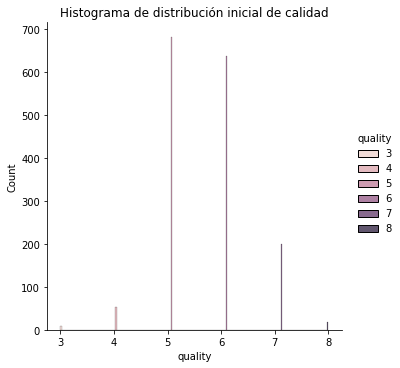

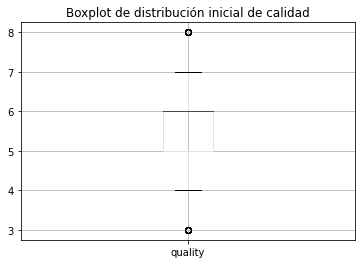

<Figure size 432x288 with 0 Axes>

In [7]:
# Distribución de la variable de clase 
sns.displot(df, x='quality', hue='quality', multiple="dodge")
plt.title("Histograma de distribución inicial de calidad")
plt.savefig(f'results/initial-histogram-quality.png')
plt.show()
plt.clf()

boxplot = df.boxplot(column=['quality'])
plt.title("Boxplot de distribución inicial de calidad")
plt.savefig("results/initial-boxplot-quality.png")
plt.show()
plt.clf()

Tal como se ve en el boxplot anterior, el juego de datos presenta elementos *outliers* que están por debajo y por encima de los datos aceptados por tres veces la desviación estándar. Como la variable es discreta, los elementos outliers están concentrados en los valores de 3 y 8.

### Distribución general de las variables al inicio

En el gráfico a cotinuación se muestra la distribución por pares entre todas las variables presentes en el dataset, mientras que en la diagonal principal, se ve la distribución de cada una de ellas.

Algo que puede destacarse es la tendencia de la distribución hacia la izquierda en prácticamente la totalidad de los casos. Puede apreciarse una aproximación a una distribución normal únicamente en los valores de pH y densidad, que hab rá que confirmar luego mediante una serie de tests.

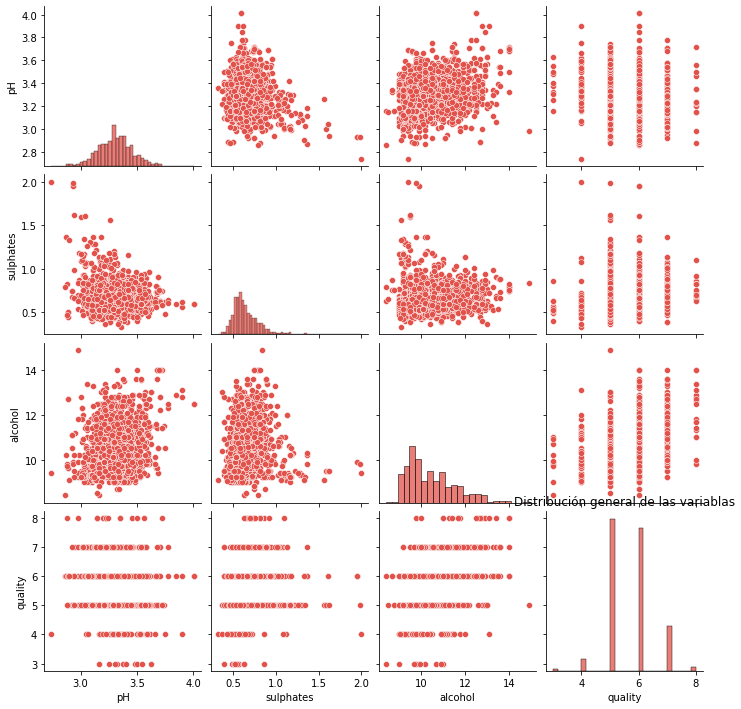

<Figure size 432x288 with 0 Axes>

In [8]:
g = sns.pairplot(df)
plt.title("Distribución general de las variablas")
plt.savefig(f"results/initial-general-distribution.png")
plt.show()
plt.clf()

## 3. Limpieza de los datos <a class="anchor" id="p3"></a>

### 3.1. ¿Los datos contienen ceros o elementos vacíos? Gestiona cada uno de estos casos. <a class="anchor" id="p3.1"></a>

Para poder gestionar estos valores, es necesario primero hacer algunas consultas al dataset previo a tomar decisiones.

### Estado inicial del dataset

In [9]:
rows, cols = df.shape
print(f"Filas: \t\t{rows}\nColumnas: \t{cols}")

Filas: 		1599
Columnas: 	4


### Tipos de las variables

In [10]:
print(df.dtypes)

pH           float64
sulphates    float64
alcohol      float64
quality        int64
dtype: object


### Cantidad de valores nulos por columnas

In [11]:
print(df.isna().sum())

pH           0
sulphates    0
alcohol      0
quality      0
dtype: int64


Como podemos comprobar, en el dataset estudiado no existen valores perdidos. En caso de existir, podrían haber sido reemplazados por una misma medida de tendencia central, es decir, por la media o mediana de ese atributo, o bien por metodos probabilistas para imputar los valores perdidos mediante el uso de métodos de regresión, inferencias basadas en modelos bayesianos o árboles de decisión.

De todos modos, si a este dataset se le añadieran nuevas filas, se debería procesar y como definición de este equipo, se eliminan primero las columas que tengan la mitad más uno de sus datos faltantes. Luego, sí se eliminan las filas que pudieran tener datos faltantes. De esta manera y en este órden, si en un dataset de tres mil registros, una columa solo tiene dos valores, pasaríamos a eliminar 2998 registros; caso contrario, si elimiásemos la columna, luego se eliminarían aquellas filas que aún tengan valores NaN, que seguramente serían muchos menos.

### Se eliminan todas las columnas que tengan la mitad +1 de posiciones a None

In [12]:
min_nulls = (df.shape[1] /1) +1
df = df.dropna(axis=1, thresh=min_nulls)

### Se eliminan aquellas filas restantes que aún tengan valores a None

In [13]:
df = df.dropna()

### 3.2. Identifica y gestiona los valores extremos. <a class="anchor" id="p3.2"></a>

Se estudia la distribución de datos según su clase *quality*, previo a la eliminación de outliers.

En la distribución general de variables se puede ver que todas ellas tienen valores atípicos, por lo que, de eliminarlos, podríamos aspirar a tener una distribución normal.

Para eliminar los outliers, eliminaremos aquellos que superen tres veces la desviación estándar.

In [14]:
df = df[(np.abs(stats.zscore(df['pH'])) < 3)]
df = df[(np.abs(stats.zscore(df['sulphates'])) < 3)]
df = df[(np.abs(stats.zscore(df['alcohol'])) < 3)]

In [15]:
rows, cols = df.shape
print(f"Filas: \t\t{rows}\nColumnas: \t{cols}")

Filas: 		1556
Columnas: 	4


Una vez eliminados los outliers, el resultado es la eliminación de aquellos registros que están en los extremos.

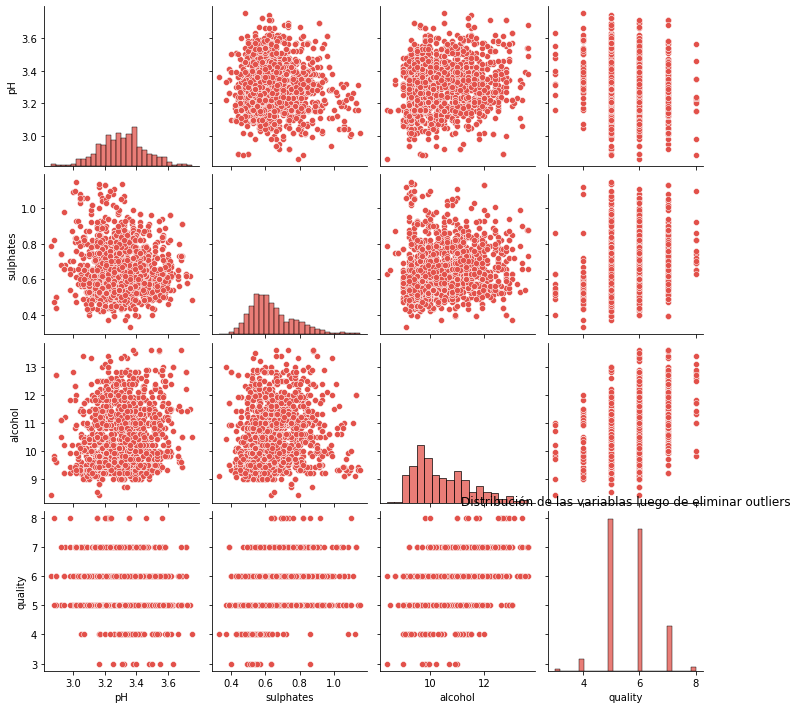

<Figure size 432x288 with 0 Axes>

In [27]:
g = sns.pairplot(df)
plt.title("Distribución de las variablas luego de eliminar outliers")
plt.savefig(f"results/initial-general-distribution-post-eliminar-outliers.png")
plt.show()
plt.clf()

### 3.3 Otros procesamientos <a class="anchor" id="p3.3"></a>

Previo a la normalización, analizaremos los rangos en los que se mueve cada variable utilizando las funciones min() y max(), que devuelven los valores mínimos y máximos por columnas, ignorando los NaN, que en este caso particular no hay.

#### Se obtienen los valores mínimo y máximo por cada columna

In [16]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

df.apply(minMax)

,pH,sulphates,alcohol,quality
min,2.86,0.33,8.4,3
max,3.75,1.15,13.6,8


#### Se cambian los ceros por un valor muy pequeño

En caso de tener que la normalidad no se cumpla, se podría, por ejemplo, aplicar un logaritmo sobre las variables para intentar obtener un juego de datos más normalizado. Como el logaritmo de cero no está definido, se cambirán los ceros por un valor muy pequeño que se aproxime mucho sin interferir con la relación.

In [17]:
columns = df.columns

print('-- Ceros iniciales por columna --')
for column in columns:
    count = (df[column] == 0).sum()
    print(f"Col: {column} -> {count}")
    
df[columns] = df[columns].replace({'0':EPSILON, 0:EPSILON})

print('\n-- Ceros post procesamiento por columna --')
for column in columns:
    count = (df[column] == 0).sum()
    print(f"Col: {column} -> {count}")

-- Ceros iniciales por columna --
Col: pH -> 0
Col: sulphates -> 0
Col: alcohol -> 0
Col: quality -> 0

-- Ceros post procesamiento por columna --
Col: pH -> 0
Col: sulphates -> 0
Col: alcohol -> 0
Col: quality -> 0


### Situación de las variables al finalizar el proceso de limpieza

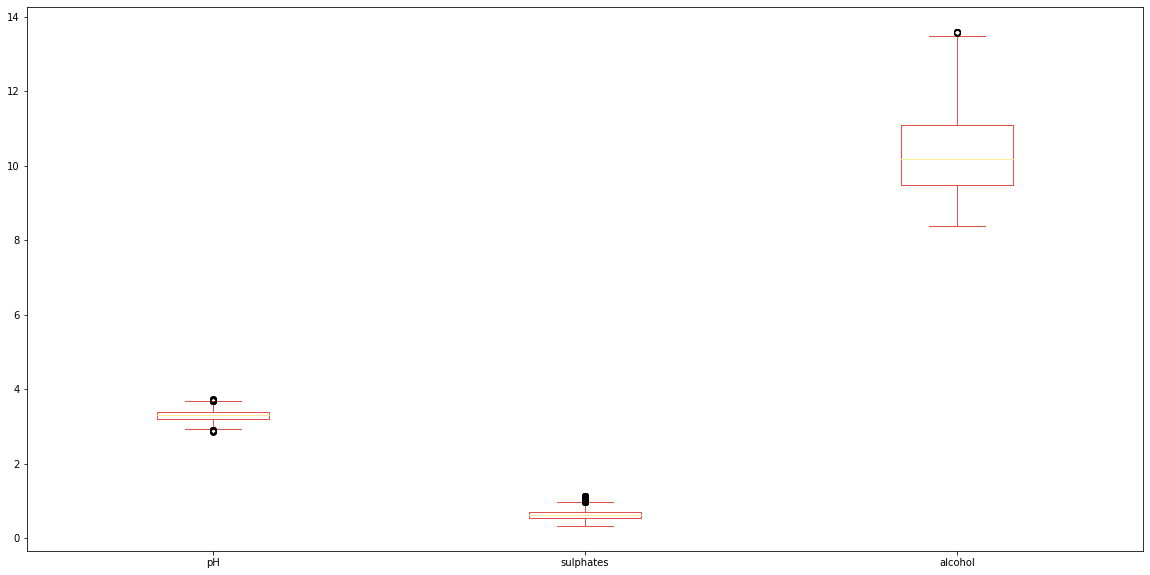

In [18]:
# Boxplot de todas las variables numericas del data set
plt.rcParams["figure.figsize"] = (20, 10)
df.iloc[:,:-1].plot(kind='box')
plt.show()

## 4. Análisis de los datos <a class="anchor" id="p4"></a>

### Matriz de correlación entre variables

"Una matriz de correlación es una tabla que indica los coeficientes de conexión entre los factores. Cada celda de la tabla muestra la conexión entre los dos factores. Una tabla de conexión se utiliza para esbozar información, como contribución a una investigación más desarrollada y como indicativo para exámenes de vanguardia."

Fuente: https://datascience.eu/es/matematica-y-estadistica/que-es-una-matriz-de-correlacion/

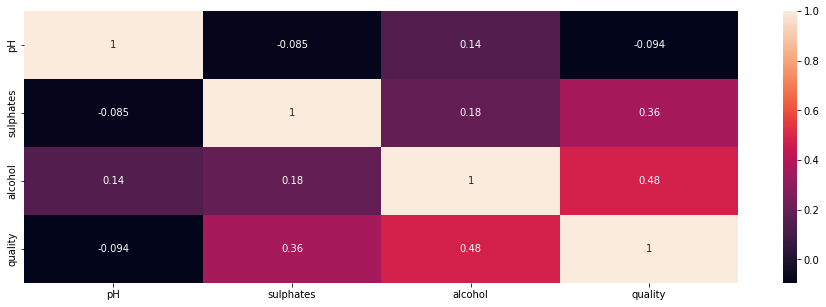

In [19]:
corr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr, annot=True)
plt.show()

En la matriz de correlación anterior puede verse que alcohol y calidad tienen la más alta correlación, seguido por sulfatos y calidad. Además, presentan una correlación casi nula entre entre el pH y la calidad.

### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (p. e., si se van a comparar grupos de datos, ¿cuáles son estos grupos y qué tipo de análisis se van a aplicar?)<a class="anchor" id="p4.1"></a>

### Categorización de la variable pH

Para comenzar, se quiere conocer la relación que hay entre la acidez del vino y su calidad, por lo que es necesario cruzar los datos de pH y quality. Puesto que el pH es una variable cuantitativa, es necesario categoriazarla en rangos de valores cuyos extremos equidisten en la ditribución.

Se divide el pH en cuatro rangos en función del nivel de acidez de la solución. Normalmente el pH puede variar de 1 a 14 unidades. Como los valores de los vinos son todos ácidos, según se puede ver en la tabla de valores mínimos y máximos, se mueve entre los 2.86 y 3.75. Seleccionamos los rangos en función de la diferencia equitativa entre la diferencia total.

Esta información es almacenada en la columna *pH_std*.

In [20]:
salto = (max(df['pH']) - min(df['pH'])) / 5
rangos = []
for i in range(0,6):
    rangos.append(min(df['pH'])+(i*salto))
df['pH_cat'] = pd.cut(df['pH'], bins=rangos, right=True)
print(pd.value_counts(df['pH_cat'], sort = True))

(3.216, 3.394]    745
(3.038, 3.216]    361
(3.394, 3.572]    349
(3.572, 3.75]      61
(2.86, 3.038]      39
Name: pH_cat, dtype: int64


En la gráfica sigueinte se muestra la nueva distribución del pH ya categorizado entre cinco rangos. Además, parecería tener una distribución normal que verificaremos en los pasos siguientes.

<AxesSubplot:xlabel='pH_cat', ylabel='count'>

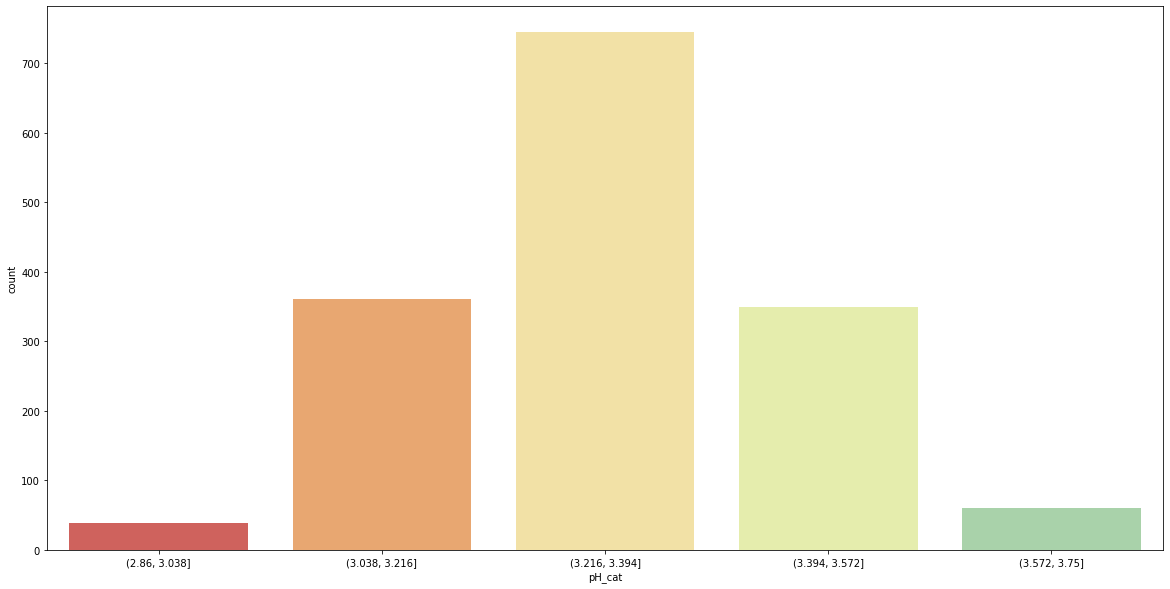

In [21]:
sns.countplot(x='pH_cat', data=df)

Además de la distribución en cantidades, puede verse también la distribución de los rangos de pH categorizado en función de la variable de clase quality. Para los valores asignados al atributo quality, la cantidad de elementos presentes por rangos como se muestra en la leyenda de este gráfico.

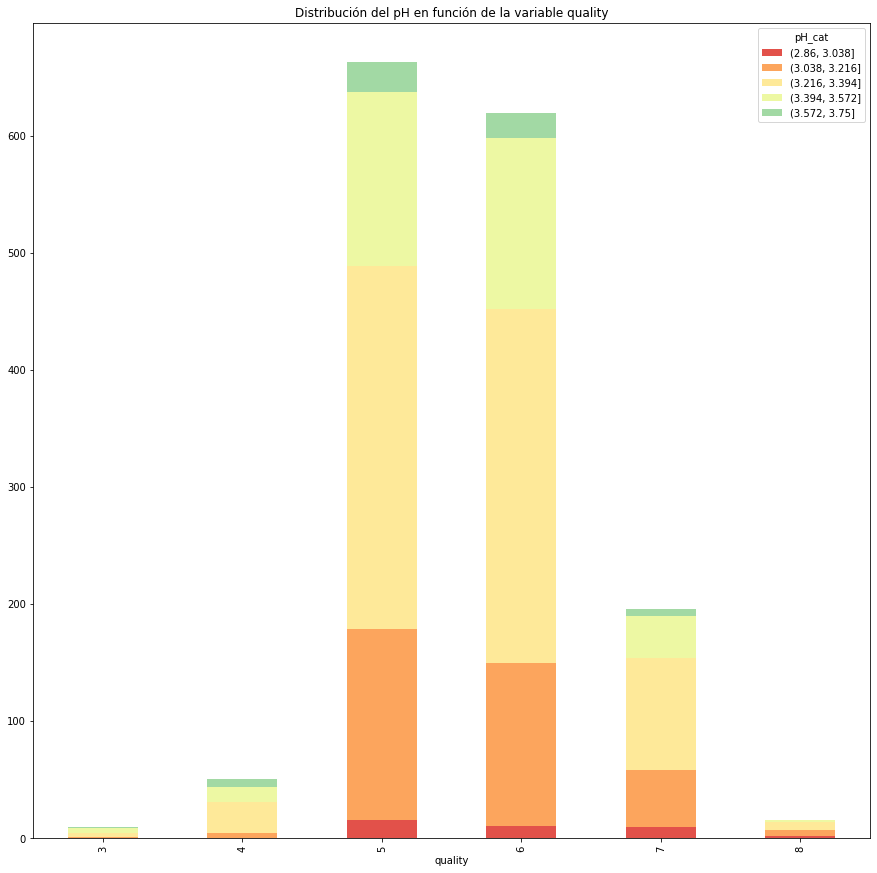

In [22]:
def stacked_bar(df: pd.DataFrame, index, columns, title):
    pivot_df = df[[index, columns]].pivot_table(index=index, columns=columns, aggfunc=len)
    pivot_df.plot.bar(stacked=True, figsize=(15, 15))
    plt.title(title)
    plt.show()
    
stacked_bar(df, 'quality', 'pH_cat', 'Distribución del pH en función de la variable quality')

### Categorización de la variable alcohol

De la misma forma que se ha categorizado la variable pH, se hace el mismo proceso con la variable alcohol. Para la categorización, primero veremos una distribución con siete rangos iguales, luego aplicaremos un algoritmo de clasificación no supervisada para realizar este agrupamiento.

In [23]:
salto = (max(df['alcohol']) - min(df['alcohol'])) / 7
rangos = []
for i in range(0,8):
    rangos.append(min(df['alcohol'])+(i*salto))
df['alcohol_cat'] = pd.cut(df['alcohol'], bins=rangos, right=True)
print(pd.value_counts(df['alcohol_cat'], sort = True))

(9.143, 9.886]      554
(9.886, 10.629]     373
(10.629, 11.371]    274
(11.371, 12.114]    184
(12.114, 12.857]     85
(8.4, 9.143]         56
(12.857, 13.6]       28
Name: alcohol_cat, dtype: int64


A continuación se puede ver la distribución de la cantidad de casos y en función de los rangos rangos en la variable alcohol.

<AxesSubplot:xlabel='alcohol_cat', ylabel='count'>

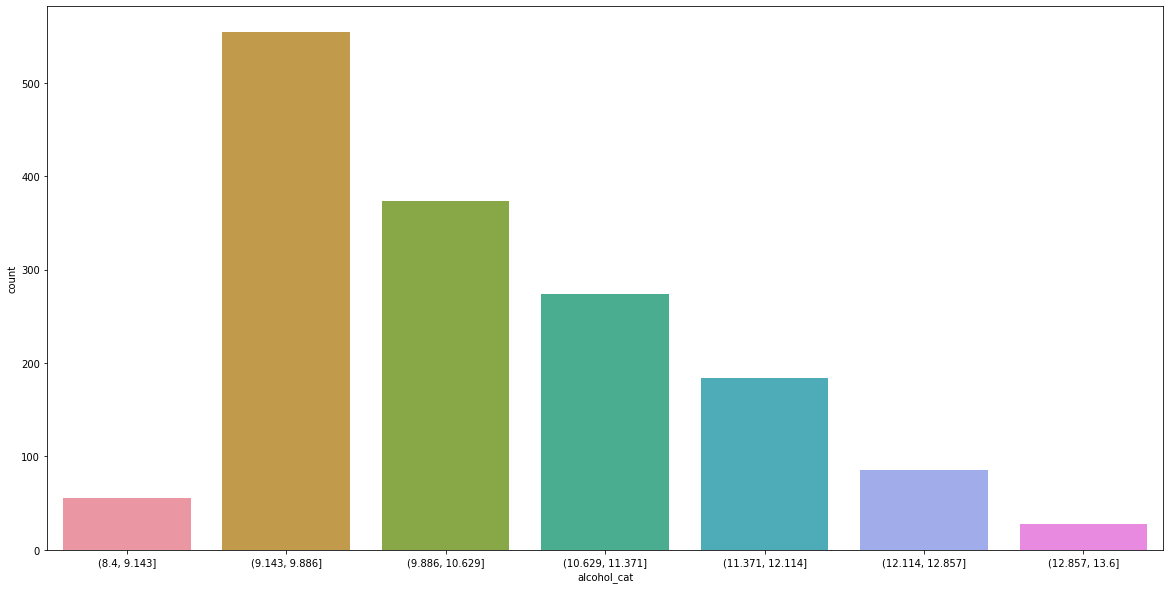

In [24]:
sns.countplot(x='alcohol_cat', data=df)

Para poder discretizar la variable alcohol, se va a utilizar el algoritmo de clasififación no supervisado, de clustering k-Means para que, dados cuatro centroides aleatorios, entrene hasta obtener cuatro clusters. En estos se agruparán los valores del alcohol estandarizado.

1.0    427
2.0    373
3.0    274
0.0    185
4.0    184
5.0     85
6.0     28
Name: alcohol_kmeans, dtype: int64


<AxesSubplot:xlabel='alcohol_kmeans', ylabel='count'>

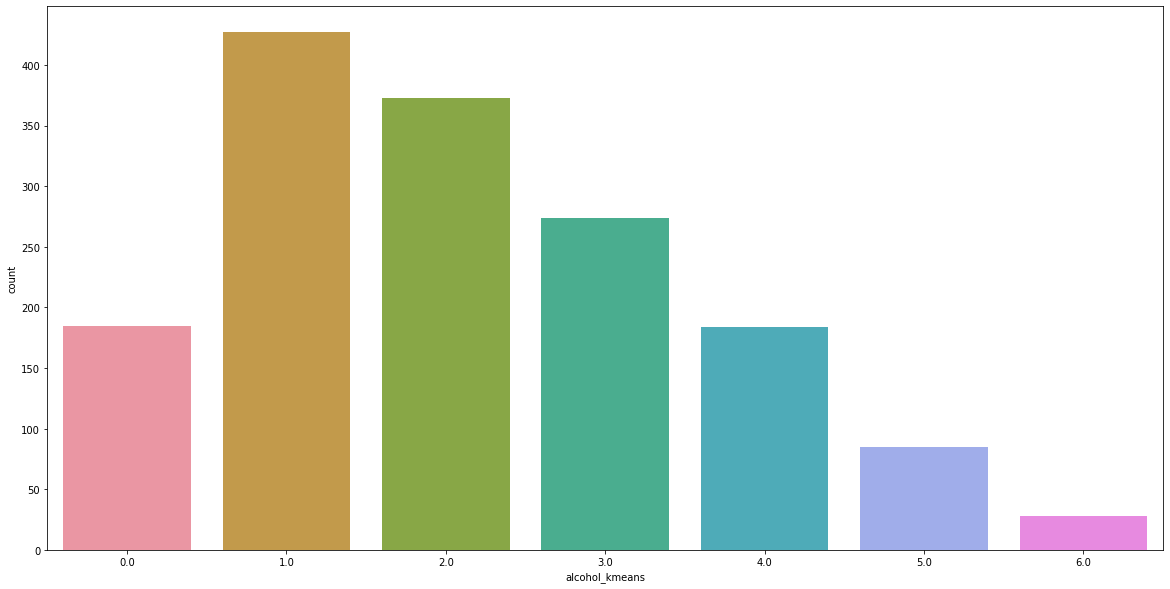

In [25]:
df['alcohol_kmeans'] = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy = "kmeans").fit_transform(df[['alcohol']])
print(pd.value_counts(df['alcohol_kmeans'], sort = True))
sns.countplot(x='alcohol_kmeans', data=df)

A diferencia del agrupameinto por rangos que se muestra previo a la aplicación de k-Means, se ha amortiguado los extremos pero aún así sigue teniendo una tendencia hacia la izquierda.

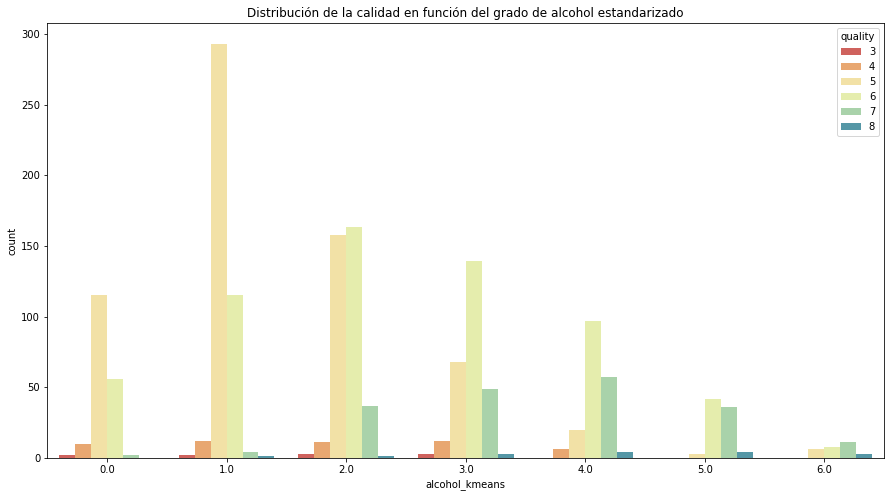

<Figure size 1440x720 with 0 Axes>

In [26]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='alcohol_kmeans', hue='quality')
plt.title("Distribución de la calidad en función del grado de alcohol estandarizado")
plt.savefig(f'results/pH-discretizado.png')
plt.show()
plt.clf()

### Categorización de la variable sulfatos

La tercera variable que vamos a categorizar son los sulfatos, para poder estudiar su interacción con las demás variables presentes en el dataset. En este caso se categoriza en ocho rangos.

(0.535, 0.638]    569
(0.638, 0.74]     359
(0.432, 0.535]    276
(0.74, 0.842]     190
(0.842, 0.945]     89
(0.33, 0.432]      25
(0.945, 1.047]     25
(1.047, 1.15]      22
Name: sulphates_cat, dtype: int64


<AxesSubplot:xlabel='sulphates_cat', ylabel='count'>

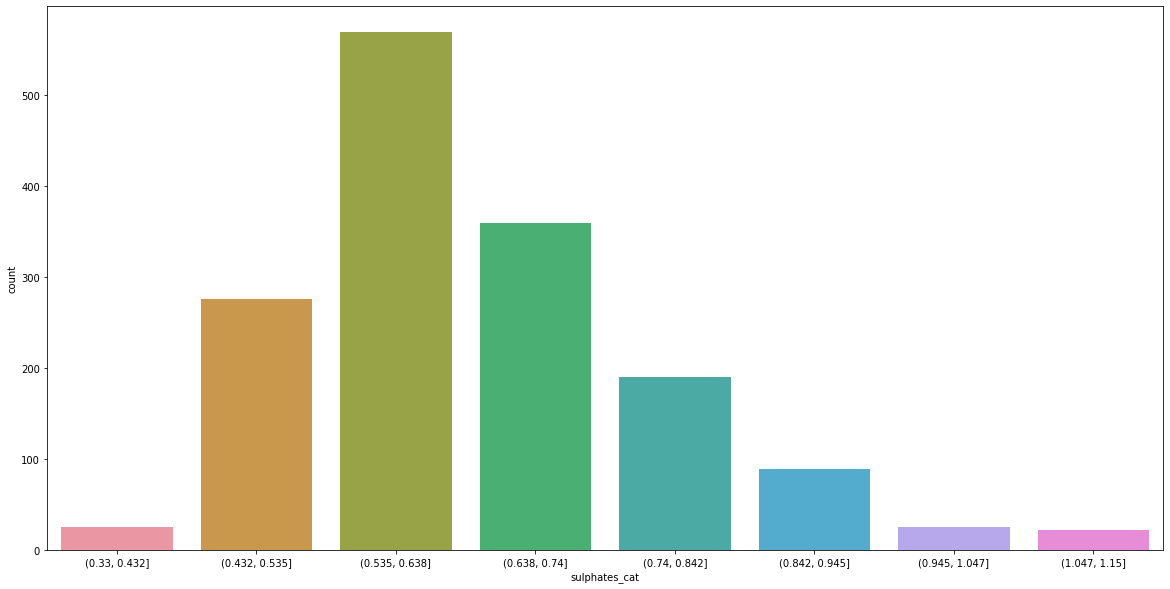

In [27]:
salto = (max(df['sulphates']) - min(df['sulphates'])) / 8
rangos = []
for i in range(0,9):
    rangos.append(min(df['sulphates'])+(i*salto))
df['sulphates_cat'] = pd.cut(df['sulphates'], bins=rangos, right=True)
print(pd.value_counts(df['sulphates_cat'], sort = True))

sns.countplot(x='sulphates_cat', data=df)

A continuación se muestra la distribución de la calidad en función de la variable sulfatos categorizada.

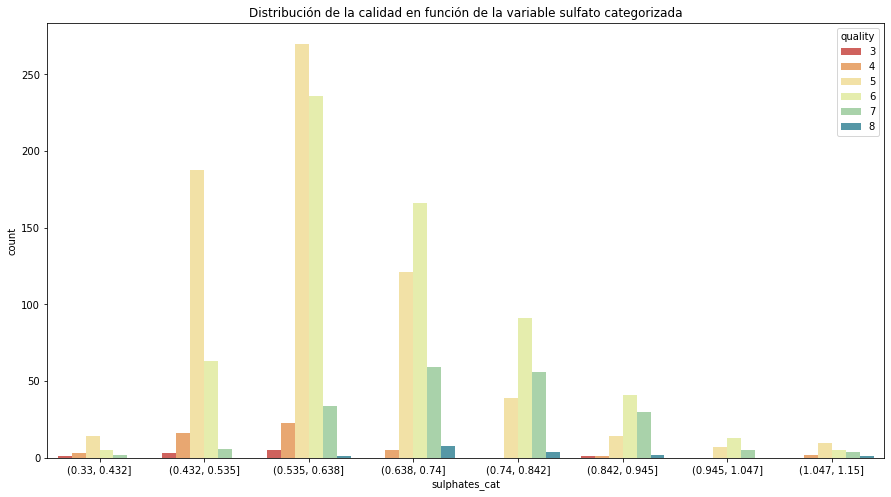

<Figure size 1440x720 with 0 Axes>

In [28]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='sulphates_cat', hue='quality')
plt.title("Distribución de la calidad en función de la variable sulfato categorizada")
plt.savefig(f'results/pH-discretizado.png')
plt.show()
plt.clf()

### 4.2. Comprobación de la normalidad y homogeneidad de la varianza.<a class="anchor" id="p4.2"></a>

#### Normalidad

Para verificar la normalidad de los grupos de datos, se utilizará el Test de Shapiro-Wilk que, según Subirats (s.f.), es uno de los métodos más potentes para medir esta condición.

In [29]:
# Solo lo aplico a variables numéricas
for column in df.select_dtypes(include=np.number).columns.tolist():
    shapiro_test = stats.shapiro(df[column])
    print(f"Variable {column} pvalue: {shapiro_test.pvalue}\n")
    

Variable pH pvalue: 0.033028494566679

Variable sulphates pvalue: 5.158308132243003e-23

Variable alcohol pvalue: 1.3127821358664482e-25

Variable quality pvalue: 2.2326263789283853e-35

Variable alcohol_kmeans pvalue: 5.08290159808916e-27



Se crean dos dataframes, uno con las variables numéricas y otro con las variables categorizadas

In [30]:
df_cont = df.copy() # Duplicamos el dataset para no eliminar las columnas ya categorizadas
df_cont = df_cont.drop(df_cont.columns[[4,5,6,7]], axis='columns')

df_cat = df.copy() # Creamos un dataframe con las columnas categorizadas únicamente
df_cat = df_cat.drop(df_cat.columns[[0,1,2,7]], axis='columns')

En función de los p-values que devuelve el método de Shapiro-Wilk, y dado que ninguno de ellos supera al α=0.05, <b>no se puede asumir normalidad en ninguna de las variables presentes</b>.

Puesto que el test de Shapiro-Wilk es más fuerte, no tiene sentido probar el test de Kolmogorov-Smirnov.


Variable pH pvalue: 0.010488299652934074

Variable sulphates pvalue: 7.733680917887398e-10

Variable alcohol pvalue: 8.799685968666487e-23

Variable quality pvalue: 3.034507743914263e-36



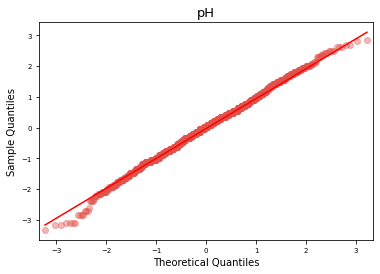

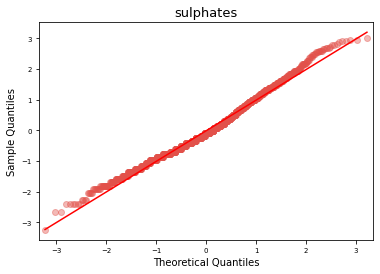

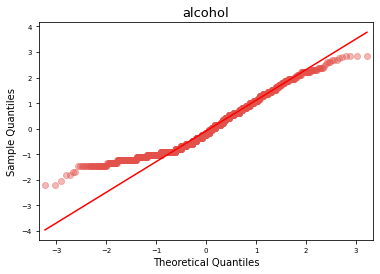

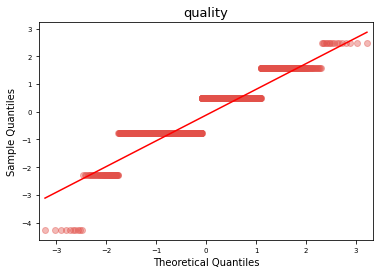

In [31]:
# Solo lo aplico a variables numéricas

for column in df_cont.select_dtypes(include=np.number).columns.tolist():
    shapiro_test = stats.shapiro(np.log(df_cont[column]))
    print(f"Variable {column} pvalue: {shapiro_test.pvalue}\n")
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

    sm.qqplot(
        np.log(df_cont[column]),
        fit   = True,
        line  = 'q',
        alpha = 0.4,
        lw    = 2,
        ax    = ax
    )
    ax.set_title(column, fontsize = 13)
    ax.tick_params(labelsize = 7)

Incluso aplicándole el logaritmo a los datos no se consigue una distribución normal.

### Homocedasticidad

Ahora bien, como la distribución no es normal, para poder verificar la homocedasticidad se debe aplicar algún test que no necesite necesite como condición la normalidad. Dentro de los test más usados para estudiar la varianza entre variables están *Levene*, *Bartlett* y *Fligner-Killeen*. Como son tests de contraste de hipótesis, al igual que en la normalidad, el *pvalue* debe superar un valor α=0.05, caso contrario no puede asumirse la homocedasticidad y se decanta entonces por una heterocedasticidad.

Como no se tiene una distribución normal en ninguna de las variables, se descarta entonces Bartlett y se debe utilizar uno de los otros dos. En esta caso se utilizará Levene para determinar al homocedasticidad o no.

#### Test de Levene

In [32]:
# Solo lo aplico a variables numéricas
columns = df_cont.select_dtypes(include=np.number).columns.tolist()
columns.remove('quality')
for column in columns:
    levene_test = stats.levene(df_cont['quality'],df_cont[column], center='median')
    print(f"Variable {column} pvalue: {levene_test.pvalue}")

Variable pH pvalue: 2.417329880128786e-235
Variable sulphates pvalue: 1.0143797708819304e-243
Variable alcohol pvalue: 5.246386691103946e-17


#### Test de Fligner

In [33]:
# Solo lo aplico a variables numéricas
columns = df_cont.select_dtypes(include=np.number).columns.tolist()
columns.remove('quality')
for column in columns:
    levene_test = stats.fligner(df_cont['quality'],df_cont[column], center='median')
    print(f"Variable {column}: {levene_test}")

Variable pH: FlignerResult(statistic=294.7992195187681, pvalue=4.475884233960919e-66)
Variable sulphates: FlignerResult(statistic=300.88658583561215, pvalue=2.111616820080578e-67)
Variable alcohol: FlignerResult(statistic=40.99438528600875, pvalue=1.5266717869646838e-10)


Ni el test de Levene ni el de Fligner alcanzan un pvalue mayor a 0.05, por lo tanto, todas las variables presentan heterocedasticidad.  

### 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.<a class="anchor" id="p4.3"></a>

Para el análisis de la homocedasticidad, se utilizará en este caso un *violinplot* que permite comprarar la dispersión de los grupos que se quieren evaluar. Aquí se compara la distribución del pH estandarizado (pH_std) en función del valor de la calidad de la columna de referencia *quality*.

#### 4.3.1. Clasificación utilizando Random Forest

Aplicamos el algoritmo de Random Forest, previa división del dataset en train y test, con una relación de 0.2 para este último.

In [34]:
random_state = 42
X = df_cont.drop(columns='quality')
y = df_cont['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Creamos el modelo de Random Forest Classifier y lo entrenamos

In [36]:
clf = RandomForestClassifier(max_depth=6, n_estimators=10, random_state=random_state) # Se crea el modelo
clf.fit(X_train, y_train) # Etapa de entrenamiento del mismo

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

Aplicamos Cross Validation y obtenemos el accuracy

In [37]:
acc = cross_val_score(clf, X_test, y_test, cv=10).mean() * 100
print(f'Cross validation accuracy = {round(acc,2)}%')

Cross validation accuracy = 57.07%


Generamos las predicciones que evalúen el modelo y evaluamos su accuracy.

In [38]:
y_pred = clf.predict(X_test)
print("Test accuracy : %0.2f" % (accuracy_score(y_test, y_pred) * 100),'%')

Test accuracy : 58.01 %


Obtenemos la matriz de confusión del modelo resultante

In [39]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 0  0  1  1  0  0]
 [ 0  0  5  3  0  0]
 [ 0  0 96 43  0  0]
 [ 0  0 31 74  3  0]
 [ 0  0  4 34 11  0]
 [ 0  0  0  4  2  0]]


Se muestra de forma gráfica la matriz de confusión.

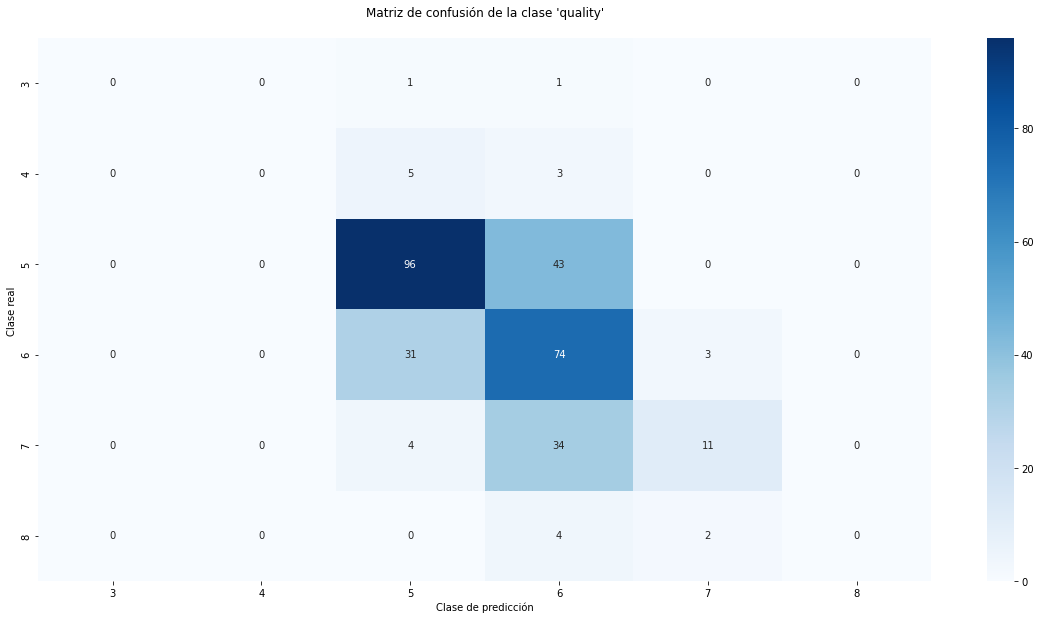

In [40]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title("Matriz de confusión de la clase 'quality'\n");
ax.set_xlabel('Clase de predicción')
ax.set_ylabel('Clase real ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([3,4,5,6,7,8])
ax.yaxis.set_ticklabels([3,4,5,6,7,8])

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
# Obtiene todas las métricas de clasificación
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.70      0.69      0.70       139
           6       0.47      0.69      0.55       108
           7       0.69      0.22      0.34        49
           8       0.00      0.00      0.00         6

    accuracy                           0.58       312
   macro avg       0.31      0.27      0.26       312
weighted avg       0.58      0.58      0.55       312



#### 4.3.2. Clasificación utilizando Regresión Logística

#### Normalización

En este punto se cuenta con el dataset ya definido y estandarizado, por lo que faltaría normalizar el mismo en una copia y entrenar con él directamente.

Puede verse en la tabla de valores máximos y mínimos, que algunos valores giran en el entorno de 0 a 1, mientras que otros van hasta el 15. Por lo tanto, se decide aplicar una normalización min-max que permita escalar los valores a un rango de 0 a 1, unificando los valores que estos pueden tomar -por columnas-, a través de una transformación lineal.

Se toman para normalizar todas las columnas de tipo float - de la 1 a la 3- ignorando la última que es categórica con representación numérica. Luego, para cada índice, se normalizan todos sus datos.

In [42]:
df_norm = df_cont.copy() # Se copia el dataset que contiene las variables continuas, sin las categóricas creadas
cols_titles = df_norm.columns[:-1]
for i in cols_titles:
    df_norm[i] = (df_norm[i] - df_norm[i].min()) / ( df_norm[i].max() - df_norm[i].min())
df_norm

,pH,sulphates,alcohol,quality
0,0.730337,0.280488,0.192308,5
1,0.382022,0.426829,0.269231,5
2,0.449438,0.390244,0.269231,5
3,0.337079,0.304878,0.269231,6
4,0.730337,0.280488,0.192308,5
...,...,...,...,...
1594,0.662921,0.304878,0.403846,5
1595,0.741573,0.524390,0.538462,6
1596,0.629213,0.512195,0.500000,6
1597,0.797753,0.463415,0.346154,5


Volvemos a realizar la división en train y set con las mismas dimensionalidades que para el modelo anterior.

In [43]:
random_state = 42
X = df_norm.drop(columns='quality')
y = df_norm['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Creamos el modelo de regresión logística y lo entrenamos.

In [44]:
# Modelo de Regresión Logística personalizado
model = LogisticRegression(tol=EPSILON, max_iter=100, multi_class = 'auto', solver = 'liblinear', class_weight = 'balanced')
model.fit( X_train, y_train )

LogisticRegression(class_weight='balanced', solver='liblinear', tol=1e-05)

Aplicamos Cross Validation para obtener el accuracy

In [45]:
acc = cross_val_score(model, X_test, y_test, cv=10).mean() * 100
print(f'Cross validation accuracy = {round(acc,2)}%')

Cross validation accuracy = 54.77%


Se predicen los datos utilizando el modelo anteriormente creado, se calcula su accuracy sobre el dataset de test, armamos su matriz de confusión y la ploteamos.

Test accuracy : 54.49 %

Matriz de Confusión utilizando Regresión Logística 
 [[ 0  0  2  0  0  0]
 [ 2  1  4  1  0  0]
 [ 5  0 99 27  3  5]
 [ 3  0 44 38 16  7]
 [ 0  0  3 11 32  3]
 [ 0  0  0  0  6  0]]


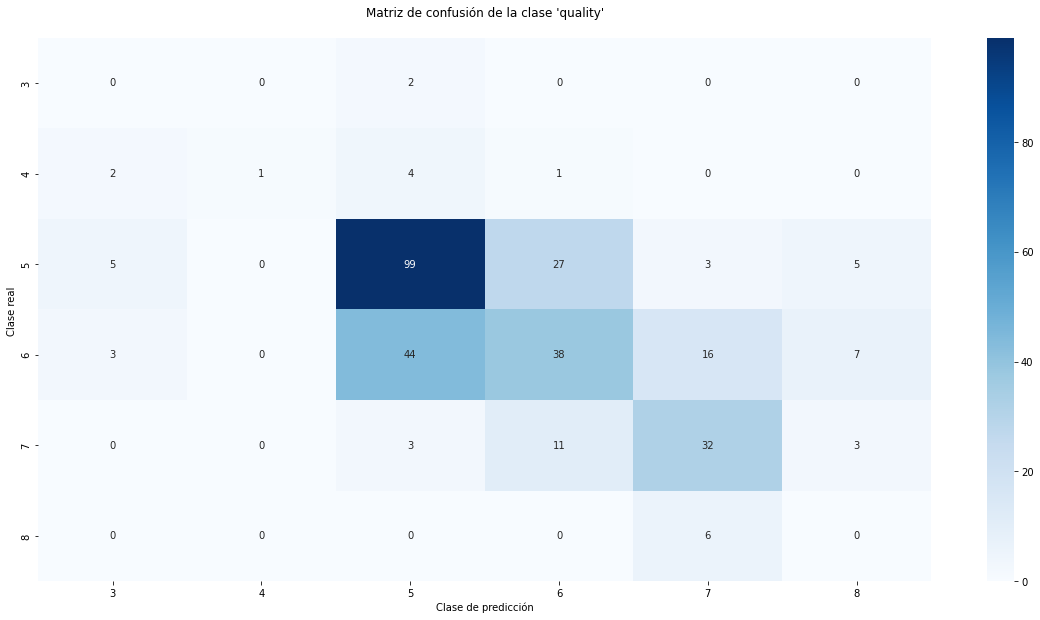


Métricas del modelo de Regresión Logística

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.12      0.22         8
           5       0.65      0.71      0.68       139
           6       0.49      0.35      0.41       108
           7       0.56      0.65      0.60        49
           8       0.00      0.00      0.00         6

    accuracy                           0.54       312
   macro avg       0.45      0.31      0.32       312
weighted avg       0.57      0.54      0.55       312



In [46]:
y_pred = model.predict( X_test )
print("Test accuracy : %0.2f" % (accuracy_score(y_test, y_pred) * 100),'%')

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión utilizando Regresión Logística \n", cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title("Matriz de confusión de la clase 'quality'\n");
ax.set_xlabel('Clase de predicción')
ax.set_ylabel('Clase real ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([3,4,5,6,7,8])
ax.yaxis.set_ticklabels([3,4,5,6,7,8])

## Display the visualization of the Confusion Matrix.
plt.show()


# Obtiene todas las métricas de clasificación
print("\nMétricas del modelo de Regresión Logística\n\n", metrics.classification_report(y_true=y_test, y_pred=y_pred))

#### 4.3.3. Clasificación usando árboles de decisión

Para implementar un árbol de decisión, es necesario fijar de antemano las características de este. En primer lugar, deberá recibir los datos sin normalizar, puesto que los valores que recibirá luego no pueden ser estandarizados con la misma escala que el dataset original. Como segundo dato, es necesario definir su profundidad, por lo que para este caso en particular diremos que tendrá una profundidad máxima de 4.

In [47]:
random_state = 42
X = df_norm.drop(columns='quality')
y = df_norm['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
model = DecisionTreeClassifier(max_depth=2, random_state=random_state)

Se entrena el árbol con los datos de train y test separados.

In [48]:
model.fit(X_train, y_train) # entrenamiento del árbol

DecisionTreeClassifier(max_depth=2, random_state=42)

Evaluamos el modelo de árbol de clasificación

In [49]:
acc = cross_val_score(model, X_test, y_test, cv=10).mean() * 100
print(f'Cross validation accuracy = {round(acc,2)}%')

Cross validation accuracy = 57.08%


Lo mismo que con los modelos anteriores, predicen los datos utilizando el modelo anteriormente creado, se calcula su accuracy sobre el dataset de test, armamos su matriz de confusión y la ploteamos.

Test accuracy : 52.56 %

Matriz de Confusión utilizando Árbol de Clasificación 
 [[ 0  0  2  0  0  0]
 [ 0  0  3  5  0  0]
 [ 0  0 88 51  0  0]
 [ 0  0 32 76  0  0]
 [ 0  0  2 47  0  0]
 [ 0  0  0  6  0  0]]


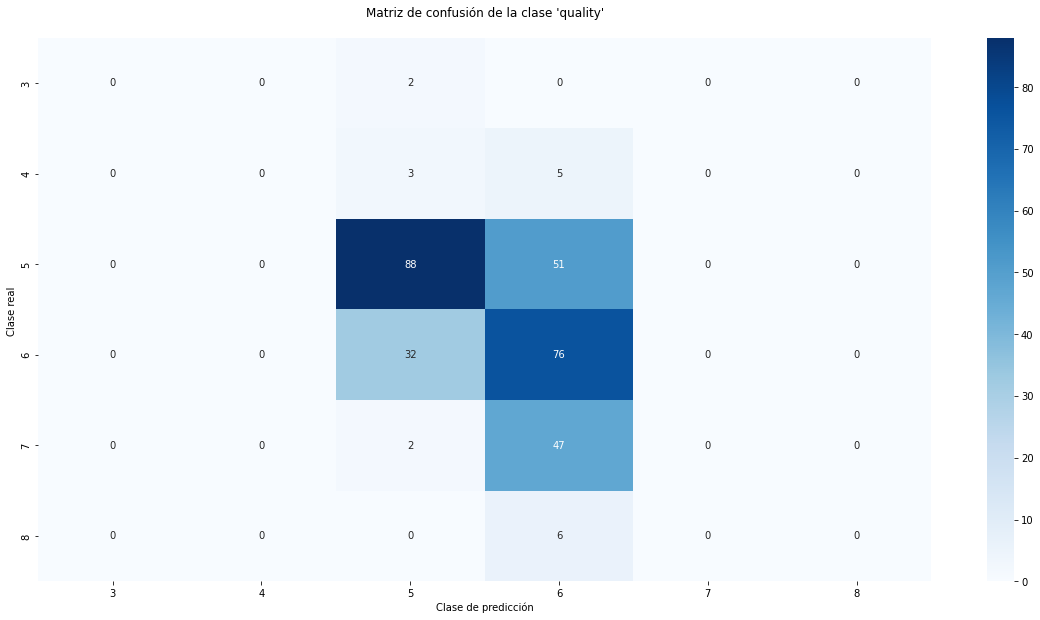


Métricas del modelo de Árbol de Clasificación

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.69      0.63      0.66       139
           6       0.41      0.70      0.52       108
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00         6

    accuracy                           0.53       312
   macro avg       0.18      0.22      0.20       312
weighted avg       0.45      0.53      0.47       312



In [50]:
y_pred = model.predict( X_test )
print("Test accuracy : %0.2f" % (accuracy_score(y_test, y_pred) * 100),'%')

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión utilizando Árbol de Clasificación \n", cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title("Matriz de confusión de la clase 'quality'\n");
ax.set_xlabel('Clase de predicción')
ax.set_ylabel('Clase real ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([3,4,5,6,7,8])
ax.yaxis.set_ticklabels([3,4,5,6,7,8])

## Display the visualization of the Confusion Matrix.
plt.show()


# Obtiene todas las métricas de clasificación
print("\nMétricas del modelo de Árbol de Clasificación\n\n", metrics.classification_report(y_true=y_test, y_pred=y_pred))

## 5. Representación de los resultados a partir de tablas y gráficas. Este apartado se puede responder a lo largo de la práctica, sin necesidad de concentrar todas las representaciones en este punto de la práctica.<a class="anchor" id="p5"></a>

Las gráficas están representadas durante el transcurso de la práctica, en cada una de los estudios que se han realizado sobre el dataset.

## 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?<a class="anchor" id="p6"></a>

Para iniciar la práctica, y dada la cantidad de variables del conjunto “winequality-red.csv”, se ha realizado una reducción de dimensionalidad. Como resultado hemos obtenido un dataset con 3 variables explicativas, pH, sulfates y alcohol, y una variable respuesta quality. 

Posteriormente se ha procedido con la limpieza de datos, en la que no se han encontrado valores vacíos y se han eliminado los outliers o valores atípicos, considerándose como valor atípico aquellos valores que superan 3 veces la desviación estándar. 
Se ha realizado un estudio de correlación entre las variables seleccionadas y la variable respuesta, obteniendo la mayor correlación en la variable alcohol.

En el último punto se han realizado tres tipos de pruebas estadísticas (Random Forest, Regresión Logística y Clasificación con árbol de decisión), con las tres variables seleccionadas (pH, sulfates y alcohol) y obtenemos que todos los modelos tienen un % de precisión bastante similar, entre el 50 y el 60%. Teniendo en cuenta los bajos porcentajes de precisión consideramos que ningún modelo explica aceptablemente la variable respuesta a partir de las tres variables seleccionadas.

## 7. Código: Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.<a class="anchor" id="p7"></a>

El código se ha desarrollado en Python, pudiendo accederse desde el repositorio GitHub cuyo enlace se adjunta a continuación. Además, se ha desarrollado sobre un Jupyter Notebook que permite la ejecución paso a paso, permitiendo trabajar con etapas del proyecto sin afectar el rendimiento de todo el script.

GitHub: https://github.com/leroydeniz/TCVD-P2

## Contribuciones<a class="anchor" id="contribuciones"></a>

| Contribuciones | Firma |
|---|---|
| Investigación previa | DM, LD |
| Redacción de las respuestas | DM, LD |
| Desarrollo código | DM, LD |

## Bibliografía<a class="anchor" id="bibliografia"></a>

1. Calvo M., Subirats L., Pérez D. (2019). Introducción a la limpieza y análisis de los datos. Editorial UOC.
2. Conover, W. J., Johnson, M. E. and Johnson M. M. (1981). A comparative study of tests for homogeneity of variances, with applications to the outer continental shelf biding data. Technometrics, 23(4), 351-361.
3. Fligner, M.A. and Killeen, T.J. (1976). Distribution-free two-sample tests for scale. ‘Journal of the American Statistical Association.’ 71(353), 210-213.
4. Jason W. Osborne (2010). Data Cleaning Basics: Best Practices in Dealing with Extreme Scores. Newborn and Infant Nursing Reviews; 10 (1): pp. 1527-3369.
5. Jiawei Han, Micheine Kamber, Jian Pei (2012). Data mining: concepts and techniques. Morgan Kaufmann.
6. Levene, H. (1960). In Contributions to Probability and Statistics: Essays in Honor of Harold Hotelling, I. Olkin et al. eds., Stanford University Press, pp. 278-292.
7. Megan Squire (2015). Clean Data. Packt Publishing Ltd.
8. OpenIntro Statistics: Fourth Edition by David Diez, Mine Çetinkaya-Rundel, Christopher Barr https://amzn.to/3vVcwa4.
9. Peter Dalgaard (2008). Introductory statistics with R. Springer Science & Business Media.
10. Team, D. S. (2020, 15 diciembre). ¿Qué es una Matriz de Correlación? DATA SCIENCE. Recuperado 14 de mayo de 2022, de https://datascience.eu/es/matematica-y-estadistica/que-es-una-matriz-de-correlacion/
11. Tutorial de Github https://guides.github.com/activities/hello-world.
12. Wes McKinney (2012). Python for Data Analysis. O’Reilley Media, Inc.